<a href="https://colab.research.google.com/github/tanyasosa/SeriesDeTiempo_TSC_A01177961/blob/main/Inflaci%C3%B3n_TSC_A01177961.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Series de tiempo
## Tanya Sosa Cavazos A01177961
### Inflación
#### Marzo 13, 2023


In [1]:
# importamos las librerias de siempre
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
# importamos las librerias de series de tiempo
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA

In [3]:
#tamaño de graficas
plt.rcParams['figure.figsize']=[12,6]

In [9]:
procesos=pd.read_csv('/content/inflación_mex_61.csv')

In [10]:
procesos.head()

,fecha,inflación_12
0,2000/01,11.02
1,2000/02,10.52
2,2000/03,10.11
3,2000/04,9.73
4,2000/05,9.48


Graficamos el proceso de Tipo de cambio

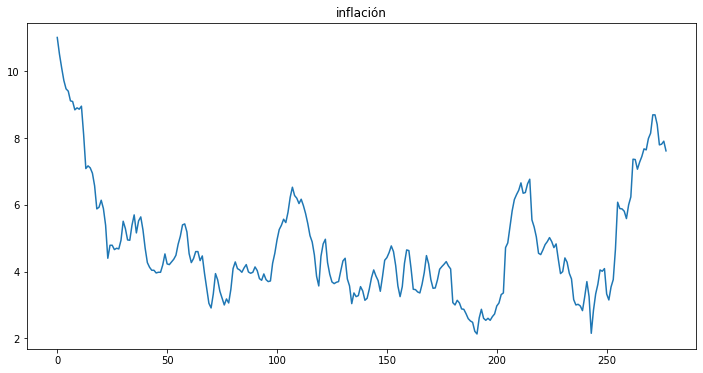

In [11]:
# figsize=( 12,6)
procesos['inflación_12'].plot()
plt.title('inflación')
plt.show()

**El tipo de cambio no es estacionario**
El tipo de cambio no es estacionario ya que la inflación, el crecimeinto economico, tasas de interes, etc, son factores que influyen ya sea en el aumento o disminuyo de valor de la moneda.
El tipo de cambio es considerado una caminata aleatoria ya que no se puede predecir.

El prónostico de la serie lo vamos a realizar en varios pasos:
1. Graficar la serie
2. Realizar la prueba de raices unitarias para verificar que el proceso sea estacionario
3. Si el proceso no es estacionario, lo hacemos estacionario. Si ya es estacionario procedemos al siguiente paso
4. Identificar qué tipo de proceso estacionario es
5. Identificado el proceso, realizar el pronóstico de la serie

## **Tipo de cambio**

In [12]:
# importamos la base de datos
inflación_12 = pd.read_csv('/content/inflación_mex_61.csv')

In [14]:
# vemos el dataframe
inflación_12.tail()

,fecha,inflación_12
273,2022/10,8.41
274,2022/11,7.80
275,2022/12,7.82
276,2023/01,7.91
277,2023/02,7.62


In [16]:
# importamos la base de datos
inflación_12 = pd.read_csv('/content/inflación_mex_61.csv')

In [40]:
inflación_12['fecha'] = pd.to_datetime(inflación_12['fecha'], format='%Y/%m')

In [41]:
inflación_12 = inflación_12.set_index('fecha')

In [42]:
inflación_12.index.freq =pd.infer_freq(inflación_12.index)

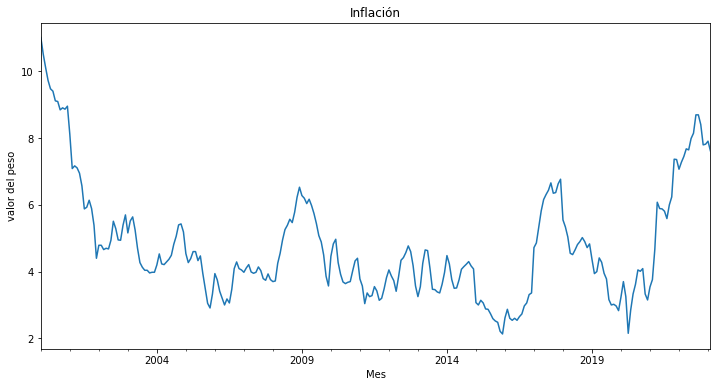

In [43]:
# comenzamos graficando la serie
# titulo y nombre a ejes
inflación_12['inflación_12'].plot();
plt.ylabel('valor del peso')
plt.xlabel('Mes')
plt.title('Inflación')
plt.show()

In [21]:
## vamos a verificar que la serie sea estacionaria
## Dickey Fuller Aumentada (Aumented Dickey fuller)
result_adf = adfuller(inflación_12['inflación_12'])
print('p-value: %.2f' % result_adf[1])

p-value: 0.05


Recuerde que

 **$H_0:$ serie No estacionaria**

 **$H_a:$ serie estacionaria**

regla de decisión si el p-valor$< \alpha $ entonces rechazar $H_0$

con un $\alpha=0.05$

conclusión: 0.05=0.05, Rechazamos H0, la inflación es una serie estacionaria





**¿Cómo diferenciar una serie?**

In [22]:
# diferenciar serie
inflación_12['inflación_diff'] = inflación_12['inflación_12'].diff()

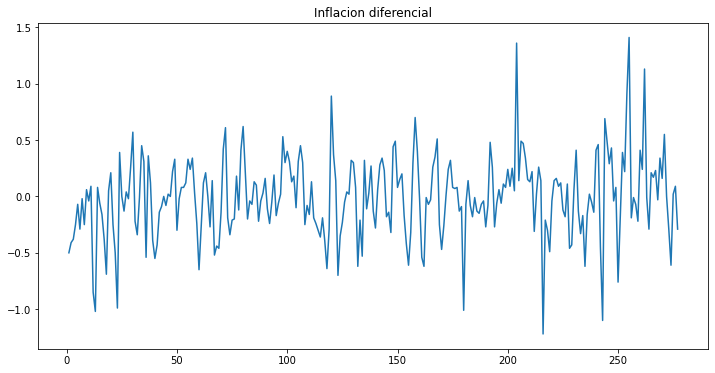

In [23]:
# graficamos esta nueva serie
inflación_12['inflación_diff'].plot()
plt.title('Inflacion diferencial')
plt.show()


Para determinar que tipo de proceso es recurriremos:

* Funcion de autocorrelación ACF
* Funcion de autocorrelación Parcial PACF

Realizamos la prueba de raices unitaria

In [24]:
result_adf = adfuller(inflación_12['inflación_diff'].dropna())
print('p-value: %.2f' % result_adf[1])

p-value: 0.00


Conclusión
Pvalue=0.00<0.05, rechazamos H0, La serie diferenciada ahora es estacionaria

In [25]:
inflación_12

,fecha,inflación_12,inflación_diff
0,2000/01,11.02,NaN
1,2000/02,10.52,-0.50
2,2000/03,10.11,-0.41
3,2000/04,9.73,-0.38
4,2000/05,9.48,-0.25
...,...,...,...
273,2022/10,8.41,-0.29
274,2022/11,7.80,-0.61
275,2022/12,7.82,0.02
276,2023/01,7.91,0.09


si la serie es estacionaria, tratamos de identificar que proceso es para eso vamos a ver si gráfica de autocorrelación y autocorrelación parcial

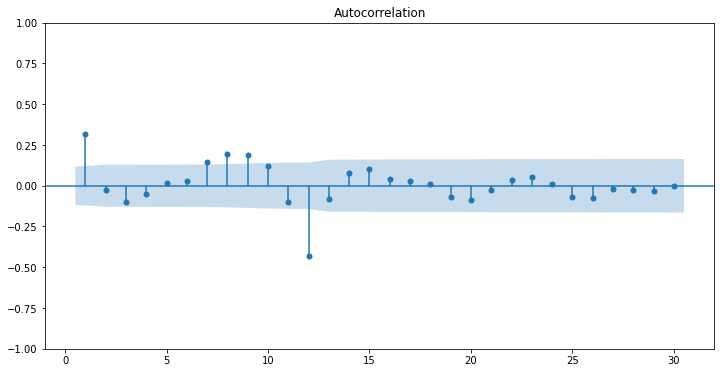

In [26]:
#plot_acf(serie, zero=False, lags=30);
plot_acf(inflación_12['inflación_diff'].dropna(),zero=False, lags=30);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


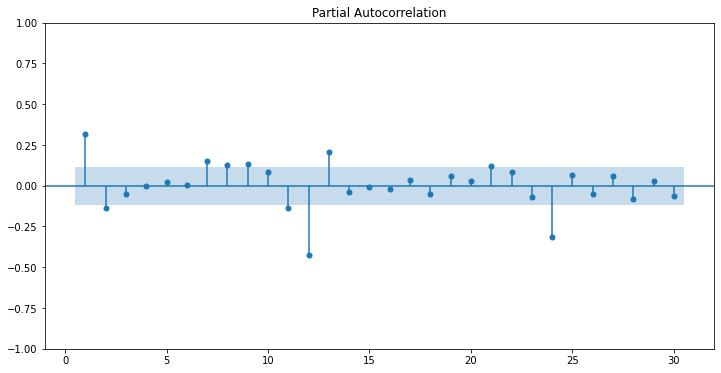

In [27]:
# autocorrelación parcial PACF
plot_pacf(inflación_12['inflación_diff'].dropna(), zero=False, lags=30);

Comentarios

In [28]:
ic = {}
for ar in range(5):
    for ma in range(5):
        print(f"AR: {ar}, MA: {ma}")
        modelo = ARIMA(inflación_12['inflación_diff'].dropna(), order=(ar, 0, ma))
        resultado = modelo.fit()
        ic[(ar, ma)] = [resultado.aic, resultado.bic]

ic = pd.DataFrame(ic, index=["AIC", "BIC"]).T
ic.index = ic.index.set_names(["AR", "MA"])
ic

AR: 0, MA: 0


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 0, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 0, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 0, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 0, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 1, MA: 0
AR: 1, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, f

AR: 1, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 1, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 1, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

AR: 2, MA: 0
AR: 2, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 2, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 2, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

AR: 2, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

AR: 3, MA: 0
AR: 3, MA: 1
AR: 3, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 3, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zero

AR: 3, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


AR: 4, MA: 0
AR: 4, MA: 1


/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self.

AR: 4, MA: 2


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting 

AR: 4, MA: 3


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting 

AR: 4, MA: 4


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


AIC         BIC
AR MA                        
0  0   225.875902  233.123937
   1   195.301092  206.173144
   2   197.052927  211.548997
   3   197.784654  215.904742
   4   198.814835  220.558940
1  0   198.845978  209.718031
   1   197.136063  211.632133
   2   199.235174  217.355262
   3   199.371844  221.115949
   4   181.386305  206.754427
2  0   195.623104  210.119174
   1   197.035040  215.155128
   2   198.854833  220.598938
   3   183.895535  209.263658
   4   188.762659  217.754799
3  0   196.886055  215.006143
   1   198.885917  220.630022
   2   177.824847  203.192970
   3   178.359862  207.352002
   4   172.715337  205.331495
4  0   198.885786  220.629891
   1   182.928570  208.296693
   2   180.936431  209.928571
   3   181.214534  213.830692
   4   173.379139  209.619314

vamos a elegir el modelo que tiene "mejor" c riterio de Akaike (AIC). el valor más pequeño

In [29]:
ic.sort_values('AIC', ascending = True)

AIC         BIC
AR MA                        
3  4   172.715337  205.331495
4  4   173.379139  209.619314
3  2   177.824847  203.192970
   3   178.359862  207.352002
4  2   180.936431  209.928571
   3   181.214534  213.830692
1  4   181.386305  206.754427
4  1   182.928570  208.296693
2  3   183.895535  209.263658
   4   188.762659  217.754799
0  1   195.301092  206.173144
2  0   195.623104  210.119174
3  0   196.886055  215.006143
2  1   197.035040  215.155128
0  2   197.052927  211.548997
1  1   197.136063  211.632133
0  3   197.784654  215.904742
   4   198.814835  220.558940
1  0   198.845978  209.718031
2  2   198.854833  220.598938
4  0   198.885786  220.629891
3  1   198.885917  220.630022
1  2   199.235174  217.355262
   3   199.371844  221.115949
0  0   225.875902  233.123937

El criterio de Akaike (AIC) y el criterio bayesiano de información (BIC) nos sirve para elegir el modelo adecuado. 
Elegir solo uno, BIC o AIC.


Ente mas grande es el AIC/BIC es un peor modelo.

de acuerdo con el criterio 

el mejor modelo segun AIC es ARMA(4,4)

el modelo  estimar AR(2)

In [30]:
modelo1 = ARIMA(inflación_12['inflación_12'].dropna(), order=(0, 1, 2)) ##AR(2)
resultado1 = modelo1.fit() # calcula
print(resultado1.summary() )  #muestra

                               SARIMAX Results                                
Dep. Variable:           inflación_12   No. Observations:                  278
Model:                 ARIMA(0, 1, 2)   Log Likelihood                 -94.635
Date:                Tue, 14 Mar 2023   AIC                            195.270
Time:                        13:50:36   BIC                            206.142
Sample:                             0   HQIC                           199.632
                                - 278                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.3592      0.051      7.056      0.000       0.259       0.459
ma.L2          0.0341      0.056      0.605      0.545      -0.076       0.144
sigma2         0.1159      0.007     16.530      0.0

In [31]:
##realizamos pronóstico
inflación_12['inflación_pronosticada'] = resultado1.predict()


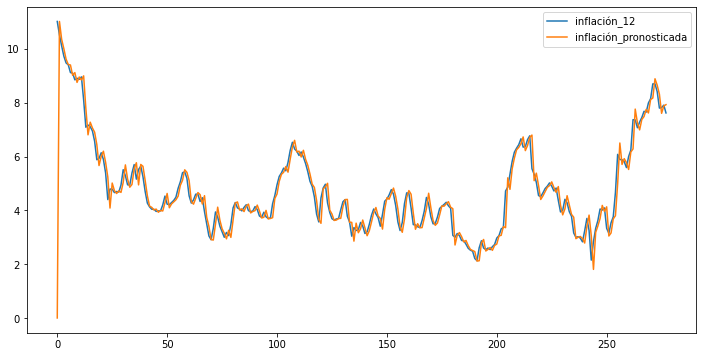

In [32]:
inflación_12[['inflación_12', 'inflación_pronosticada']].plot();

In [33]:
inflación_12.iloc[0]['inflación_pronosticada']=inflación_12.iloc[0]['inflación_12']

<ipython-input-33-743ac14d8b54>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  inflación_12.iloc[0]['inflación_pronosticada']=inflación_12.iloc[0]['inflación_12']


In [35]:
inflación_12.describe()

,inflación_12,inflación_diff,inflación_pronosticada
count,278.000000,277.000000,278.000000
mean,4.751511,-0.012274,4.721005
std,1.677582,0.361811,1.697454
min,2.130000,-1.220000,0.000000
25%,3.625000,-0.220000,3.634929
50%,4.290000,-0.010000,4.275004
75%,5.462500,0.210000,5.484230
max,11.020000,1.410000,11.020000


In [36]:
inflación_12.tail()

,fecha,inflación_12,inflación_diff,inflación_pronosticada
273,2022/10,8.41,-0.29,8.649638
274,2022/11,7.80,-0.61,8.317443
275,2022/12,7.82,0.02,7.605967
276,2023/01,7.91,0.09,7.879253
277,2023/02,7.62,-0.29,7.928337


In [38]:
resultado1.predict(278,282)

278    7.510291
279    7.499786
280    7.499786
281    7.499786
282    7.499786
Name: predicted_mean, dtype: float64

El modelo pronostica que para Abril del 2023 la inflacion va a estar a 7.510291

In [39]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive
